## Chinese Exports: In Search of Anecdote

The US dependence on China is built on stories, but we must color the picture with data. This study searches the WDI database for stories on how China dominates, and where its near-peers are. 

To my joy, the nearest peer in China's greatest export, consumer electronics, is Mexico. I outline this peer relationship, below.

In [1]:
import os

In [2]:
!pip install altair plotly

In [3]:
import altair as alt

In [4]:
import plotly.express as px

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Multiple csv Files, pertaining to the CPATPP Nations

This involved downloading data from 1988 until 2021, relative to all export categories for each CPATPP signatory, with export data at the WDI. 

The system I used was WITS, the World Bank Integrated Trade Solution. The downloads were generated for my study, by WITS. 
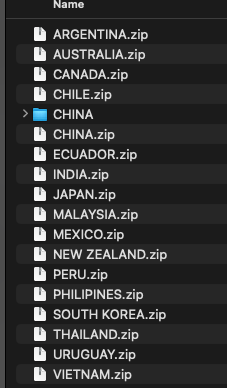

In [33]:
def getExportsByNationAndSectorAnnual():
    ret = []
    for root, dirs, files in os.walk("./captppexportsByCategories/"):
        for filename in files:
                ret.append(filename)
    return ret

csvFileList = getExportsByNationAndSectorAnnual() 
li = []                         
for filename in csvFileList:
    csv = "captppexportsByCategories/" + filename
    df = pd.read_csv(csv, index_col=None, header=0)
    li.append(df)

pacificExporters = pd.concat(li, axis=0, ignore_index=True)

In [20]:
pacificExporters.head(3)

Nomenclature ReporterISO3  ProductCode ReporterName PartnerISO3  \
0           H0          AUS            1    Australia         USA   
1           H0          AUS            1    Australia         USA   
2           H0          AUS            1    Australia         USA   

     PartnerName  Year TradeFlowName  TradeFlowCode  TradeValue in 1000 USD  
0  United States  1988    Gross Exp.              2                    1044  
1  United States  1989    Gross Exp.              2                     849  
2  United States  1990    Gross Exp.              2                     770

In [8]:
pacificExporters['TradeValue in 1000 USD'] = pacificExporters['TradeValue in 1000 USD'].astype('int64') 

In [9]:
pacificExporters.dtypes

Nomenclature              object
ReporterISO3              object
ProductCode                int64
ReporterName              object
PartnerISO3               object
PartnerName               object
Year                       int64
TradeFlowName             object
TradeFlowCode              int64
TradeValue in 1000 USD     int64
dtype: object

In [21]:
pacificExporters.columns

Index(['Nomenclature', 'ReporterISO3', 'ProductCode', 'ReporterName',
       'PartnerISO3', 'PartnerName', 'Year', 'TradeFlowName', 'TradeFlowCode',
       'TradeValue in 1000 USD'],
      dtype='object')

## Nations Inside the Study: CPATPP Signatories

In [11]:
print(pacificExporters['ReporterName'].unique())
len(pacificExporters['ReporterName'].unique())

['Australia' 'Japan' 'Uruguay' 'Canada' 'Peru' 'Vietnam' 'China' 'Ecuador'
 'New Zealand' 'Argentina' 'Malaysia' 'Chile' 'Mexico' 'Korea, Rep.'
 'Philippines' 'India' 'Thailand']


17

In [13]:
pacificExporters[(pacificExporters['ReporterName'] == 'China') & (pacificExporters['ProductCode']==85)].max()

Nomenclature                         H0
ReporterISO3                        CHN
ProductCode                          85
ReporterName                      China
PartnerISO3                         USA
PartnerName               United States
Year                               2021
TradeFlowName                Gross Exp.
TradeFlowCode                         2
TradeValue in 1000 USD        133485180
dtype: object

## China's Primary 10 export categories

China locates 76% of its 430B USD exports within the 10 following categories.

In [34]:
chinaExp = pd.read_csv('EXPORTSFRMCHN/CHN US.csv')
cols =['ProductCode','ProductDescription','CHN in 1000 USD ']
chinaExp[cols]
ceRanked = chinaExp[cols].sort_values(by='CHN in 1000 USD ', ascending=False)
ceRanked['CHN in 1000 USD '] = ceRanked['CHN in 1000 USD '].astype(int)
ceRanked.head(10)

ProductCode                   ProductDescription  CHN in 1000 USD 
83           85  Electrical machinery and equipment          106971557
82           84  Nuclear reactors, boilers, machiner          91726698
92           94  Furniture; bedding, mattresses, mat          29253950
93           95  Toys, games and sports requisites;           18617373
60           61  Apparel and clothing accessories; k          16008452
38           39        Plastics and articles thereof          15370728
85           87  Vehicles; other than railway or tra          15134190
61           62  Apparel and clothing accessories; n          14070154
63           64  Footwear; gaiters and the like; par          11996447
72           73               Iron or steel articles          10218080

In [15]:
top10CHN = ceRanked.head(10)
print(top10CHN.columns)
cats = alt.Chart(top10CHN).mark_bar().encode(
    x="CHN in 1000 USD :Q", y='ProductCode:N').properties(
    title={"text":"The Major Export Categories, China to United States",
    "subtitle":["The top ten categories, earning 75% of China's Export Income"]},
    width = 800, height=300)
catLabels = cats.mark_text(align='left',
    baseline='middle',
    dx=7
).encode(
    text='ProductDescription'
)
cats + catLabels

Index(['ProductCode', 'ProductDescription', 'CHN in 1000 USD '], dtype='object')


alt.LayerChart(...)

In [35]:
listOfAllChinaTop10 = ceRanked['ProductCode'].head(10)


## Value of the top 10 categories, in China Exports to USA, 2017

The composite value of all Chinese Exports to the US in 2017 was ~430 billion USD. The top 10 export categories comprise ~76% of total Chinese exports to the United States. 

In [17]:
all = ceRanked['CHN in 1000 USD '].sum()*1000
all

430328097000

In [18]:
topn = ceRanked['CHN in 1000 USD '].head(10)
topn.sum()*1000
topnpct = (topn.sum()*1000)/all

topnpct

0.7653872273183222

## Studying China's Top 10 Export Categories, Relative to CPATPP Comptetion

In [19]:
pacificExporters.columns

Index(['Nomenclature', 'ReporterISO3', 'ProductCode', 'ReporterName',
       'PartnerISO3', 'PartnerName', 'Year', 'TradeFlowName', 'TradeFlowCode',
       'TradeValue in 1000 USD'],
      dtype='object')

In [20]:
pacificExporters.head(1)

Nomenclature ReporterISO3  ProductCode ReporterName PartnerISO3  \
0           H0          AUS            1    Australia         USA   

     PartnerName  Year TradeFlowName  TradeFlowCode  TradeValue in 1000 USD  
0  United States  1988    Gross Exp.              2                    1044

In [21]:
k =pacificExporters[pacificExporters['ProductCode'].eq(85)]

In [22]:
sjReturn = pd.DataFrame([{"year":2000, "narrative":"Steve Jobs Appointed as CEO of Apple"}])
iPhoneDebuts = pd.DataFrame([{"year":2008, "narrative":"iPhone debuts"}])

In [36]:
verticalSJ = alt.Chart(sjReturn).mark_rule(color="grey", strokeWidth=2).encode(x='year:T')
iphoneDebut = alt.Chart(iPhoneDebuts).mark_rule(color="grey", strokeWidth=2).encode(x='year:T')
iphonetext = alt.Chart(iPhoneDebuts).mark_text(
    align='left',
    baseline='middle',
    dx=7,
    dy=-135,
    size=11
).encode(
    x='year:T',
    x2='year:T',
    text='narrative',
    color=alt.value('#000000')
)
sjtext = alt.Chart(sjReturn).mark_text(
    align='right',
    baseline='middle',
    dx=7,
    dy=-135,
    size=11
).encode(
    x='year:T',
    x2='year:T',
    text='narrative',
    color=alt.value('#000000')
)

## Case Study: Mexico vs China, and the Arrival of the iPhone

In [37]:
tit1 = alt.TitleParams('The Return of Steve Jobs to Apple, and the Surge of Chinese Electronic Sector')
lineChart1 = alt.Chart(k,title=tit1).mark_line().encode(x='Year:O', y='TradeValue in 1000 USD:Q', color='ReporterName',
                               tooltip=['ReporterName', 'TradeValue in 1000 USD', 'Year']
                               ).properties(
    width = 800, height=500).interactive()
(lineChart1+verticalSJ+iphoneDebut+iphonetext+sjtext)

alt.LayerChart(...)

## Mexican Electronics Exports, then and now
Mexico's electronics exports to the US are now roughly one half that of China's. 

In [25]:
fig = px.treemap(k, path=[px.Constant("all"), 'ReporterName', 'Year'], values='TradeValue in 1000 USD')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Export Value of the iPhone

Note the annual value of Chinese Electronics Exports to the US in the heatmap, above. This is ~133B USD. 

Per this source, the iPhone is the source of 50% of Apple's annual revenue, which is currently $248B USD. [https://www.investopedia.com/articles/investing/022316/economics-iphone-aapl.asp#:~:text=Understanding%20How%20the%20iPhone%20Makes%20Money%201%20Apple,declined%20in%202019%20by%2014%25%20versus%202018.%20]

This suggests the power of moving product supply chains to nations, and its impact on that country's National Income.

In [26]:
MX = k[(k['ReporterName']=="Mexico") & (k['Year'].gt(2007))]
CHN = k[(k['ReporterName']=="China") & (k['Year'].gt(2007))]
MXCHNcombine = pd.concat([MX, CHN], axis=0)
# print(MXCHNcombine.dtypes)  #['TradeValue in 1000 USD','Year']
title = alt.TitleParams('Moving Production of a big product causes big results: the case of the iPhone in China')
dual = alt.Chart(MXCHNcombine).mark_line().encode(
    x='Year:O',
    y='TradeValue in 1000 USD:Q',
    color='ReporterName:N',
    strokeDash='ReporterName:N'
).properties(
    title={"text":"Moving Production of a big product causes big results: the case of the iPhone in China",
        "subtitle":["With the entry of the iPhone, China blasts past its near peer, Mexico, in the Electronics Sector"]},
    width = 800, 
    height=300).interactive()
averages = alt.Chart(MXCHNcombine).mark_rule().encode(
    y='average(TradeValue in 1000 USD)',
    color='ReporterName',
    size=alt.value(2)
)
dual + averages+iphoneDebut +iphonetext

alt.LayerChart(...)

## Moving major export categories outside of China, and the geoeconomic impact, good and bad

the shift of manufacturing and trade relations from one nation to another creates sizeable shifts in national income. The iPhone is a major case study of this, but what would happen if the US had to shift other sectors out of China?

[NEXT -->](https://kfhtkfxepwnn.labs.coursera.org/notebooks/compExam/part%204%2C%20Can%20the%20US%20Achieve%20Economic%20Independence%20from%20China%3F.ipynb#Summary:-Can-the-US-Achieve-Economic-Independence-from-China?)